In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Name and movies datasets

For this project we decided to work on the CMU movie dataset containing metadata extracted from Freebase, including Movie metadata like Movie box office revenue, genre, release date, runtime, and language but also Character metada like character names and aligned information about the actors who portray them, including gender and estimated age at the time of the movie's release. 
First let's see what the 2 metadasets contains.

#### Characters
The dataset contains informations  450,669 characters aligned to the movies such as Wikipedia movie ID,  Freebase movie ID, Movie release date, Character name, Actor date of birth, Actor gender, Actor height (in meters), Actor ethnicity,Actor name, Actor age at movie release, Freebase character/actor map ID, Freebase character ID, Freebase actor ID. 


#### Movies
The dataset contains informations on 81,741 movies such as the Wikipedia movie ID, Freebase movie ID, Movie name, Movie release date, Movie box office revenue, Movie runtime, Movie languages, Movie countries, Movie genres .



## Cleaning

The cleaning task was implement in the *clean_raw_data()* method of our different CharacterData and MovieData classes implementation (by Wikipedia Movie ID) and validated using the *check_clean_data()* method, available and shared by the 2 datasets (python inheritance).

From both metadataset, we directly oberved similar features such as Wikipedia Movie ID and Freebase Movie ID that is useful for futur merge of the 2 dataset. However, as in both datasets we saw that there were several columns containing Freebase and Wikipedia IDs for actors, characters and films, we decided to put them aside as the data is too difficult to access.

This are the different steps we applied to both datasets before merging:

Character dataset:
- Load with the right spacer.
- Rename the columns for proper understanding.
- Check the good type format : Actor date of birth and the Release Date as a datetime, and the other into objects.
- Deal with missing values : we wrote them as NaN or NaT
- Droping unwanted columns
- Checking that the cleaning was made

Movie dataset :
- Load with the right spacer.
- Rename the columns for proper understanding.
- Modify the Language, Country and Genre columns:  the information was a JSON format not readable nor accessible so we isolate the information and replace it by a human-readable string format.
- Modify the datatypes of movie runtime into timedelta and the release date into a datetime object for further manipulation.
- Modify the movie Name, Language, Country and Genre:  we checked that they were in object type and modified them if not.
- Deal with missing values : we wrote them as NaN or NaT
- Dropping the unwanted columns
- Check that the cleaning was made


We kept the whole dataset with NaN and NaT values in a specific file to keep features that could be interesting even if the rate of missing values is very high (such as etchnicity or Box office revenue). However, for the following notebook, to make some we decided to remove this 2 columns since they have more than 70% missing values.


## Demo

Here, we will import and clean the data base to demonstrate the process.


In [2]:
%pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports my code from the file src/data/movies_char_data.py
import src.data.movies_char_data as MovieChar

#### Characters 

In [4]:
character_df = MovieChar.CharacterData("Character", "character.metadata.tsv", output_name = "character_data_clean.csv")
character_df.raw_df.head()

Character : loaded 450668 rows !


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [5]:
# print duplicated rows
character_df.clean_raw_data()
character_df.clean_df.head()

Character : Cleaning the raw data


,Wikipedia_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,975900,2001-08-24,LIEUTENANT MELANIE BALLARD,1974-08-15,F,1.780,NATASHA HENSTRIDGE,27.0
1,975900,2001-08-24,DESOLATION WILLIAMS,1969-06-15,M,1.727,ICE CUBE,32.0
2,975900,2001-08-24,SGT JERICHO BUTLER,1967-09-12,M,1.750,JASON STATHAM,33.0
3,975900,2001-08-24,BASHIRA KINCAID,1977-09-25,F,1.650,CLEA DUVALL,23.0
4,975900,2001-08-24,COMMANDER HELENA BRADDOCK,1949-05-26,F,1.727,PAM GRIER,52.0


In [6]:
character_df.pipeline()

Character : loaded 450668 rows !
Character : Cleaning the raw data
Character : Clean data has been and saved to data/clean/movies_char/character_data_clean.csv! (171826 rows)


####  Movie dataset

In [7]:
movie_df = MovieChar.MovieData("Movie", "movie.metadata.tsv", output_name = "movie_data_clean.csv")

#Display name and file_name
print(movie_df.name, movie_df.file_name)

movie_df.raw_df.head()

Movie : loaded 81740 rows !
Movie movie.metadata.tsv


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [8]:
# print duplicated rows
movie_df.clean_raw_data()
movie_df.clean_df.head()

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,28463795,Brun bitter,NaT,NaN,0 days 01:23:00,Norwegian,Norway,"Crime Fiction, Drama"
2,9363483,White Of The Eye,NaT,NaN,0 days 01:50:00,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
3,261236,A Woman in Flames,NaT,NaN,0 days 01:46:00,German,Germany,Drama
4,13696889,The Gangsters,1913-05-29,NaN,0 days 00:35:00,"Silent film, English",United States of America,"Short Film, Silent film, Indie, Black-and-whit..."


In [9]:
movie_df.pipeline()

Movie : loaded 81740 rows !
Movie : Clean data has been and saved to data/clean/movies_char/movie_data_clean.csv! (81740 rows)


## Merging Movie and Character into one dataset

We merged the 2 dataset following the Wikipedi movie ID.

In [10]:
from src.utils.movies_utils import *

mov_char_data = merge_movies_characters_data(movie_df, character_df)

mov_char_data.head() # When we call the data name object, it returns the cleaned data

Duplicates found: 412 duplicates ! removing them...


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.85,CLIFF DEYOUNG,55.0
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.63,JUDI EVANS,35.0


In [11]:
# Print size of the dataset
print(mov_char_data.shape)

(171400, 14)


In [12]:
mov_char_data.head(100) # When we call the data name object, it returns the cleaned data
      

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.85,CLIFF DEYOUNG,55.0
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.63,JUDI EVANS,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1364293,They Knew What They Wanted,NaT,932000.0,0 days 01:36:00,English,United States of America,"Romance Film, Marriage Drama, Drama, Black-and...",AMY PETERS,1908-10-06,F,1.61,CAROLE LOMBARD,31.0
96,29772142,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,0 days 01:50:00,Malayalam,India,Drama,GATHA,1985-11-14,F,1.65,MAMTA MOHANDAS,25.0
97,29772142,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,0 days 01:50:00,Malayalam,India,Drama,SATHYABHAMA,1985-09-17,F,NaN,DHANYA MARY VARGHESE,25.0
98,26878691,Mysterious Island,NaT,NaN,0 days 01:40:00,Standard Mandarin,Hong Kong,"Action/Adventure, Wuxia, Martial Arts Film, Ch...",OUYANG FENG,NaT,M,NaN,WONG LIK,NaN


# Names datasets

In order to answer our research questions, we needed to find some birth registries from different countries. Those were freely available and we found datasets for the following countries:

- France
- USA
- United Kingdom
- AJOUTER AUTRE SI BESOIN

Since they all came from different places and didn't follow the same structure, we had to decide what kind of data was necessary for our project and what structure would be the most practical to work with. We ended-up with the following collumns in our dataframes:

1. **Year** : An integer value giving the year of the count 
2. **Name** :  A string representing the name that was counted
3. **Sex** : There are two possible characters, 'F' (female) and 'M' (male)
4. **Count** : An integer value giving the count of the name during this year

## Data homogenization

The cleaning task was implement in the *clean_raw_data()* method of our different NamesData classes implementation (by country) and validated using the *check_clean_data()* method, available and shared by all the name datasets (python inheritance).

### Column structure
This task was not too difficult since it was mostly reordering, renaming the ones needed and dropping the ones that were not useful for our project. We also made sure that the same type was used on the collumns of the different datasets. 

### Year 
All of our dataset had the same year format, but some had missing values in this field, which made those row useless and they were therefore discarded.
This collumn made it hard to find datasets from more countries, since a lot of them started to count only in the early 2000's, which doesn't give us enough data to detect real changes in the distribution. (The movie data base ends in 2012)

### Name
This was the hardest column to sanitize and clean since a lot of variation of a same name are possible. We ended by defining a regex expression do define what we would accept as a valid name : ^[A-Z-\s\']+$

This allows us to limit ourselves to names composed only of capitalized letters, spaces, '-' for composed names and ''' for the some regional variations. This rule is really strict and would have made us lose a considerable proportion of our dataset. This is where the data cleaning process came to help homogenize our data and it mainly consisted of the following operations:

- Converting all the name to uppercase
- Removing all accents on letter, for example é becomes e.

Some names have different spellings, for example you can write JEREMY and JEREMIE, but we decided to count this as two separate entries since grouping "similar" is out of the scope of this project and is not an uniformised concept.

### Sex
The french dataset had some integer values that we converted to the expected format. This field is useful for our research questions, but complicated the dataset research, since a lot of countries did not include this information in their registries.

### Validation

The python class representing our datasets contains a method *check_clean_data()* that checks multiple conditions to be sure that the data is uniform. 

- Checks the collumns' name
- Checks if some missing values are present
- Checks the data type of each collumn
- Checks for duplicated rows (same name, same sex and same name)
- Checks that the strings respects the defined regex expressions
- Checks that the counts and years are coherent numbers 

## Demo

Here, we will import and clean the data base to demonstrate the process.


In [13]:
import src.data.names_data as NamesData
ukNames = NamesData.UKNamesData("UK", "ukbabynames.csv")

# The raw data directly from the file
ukNames.raw_df.head()

UK : loaded 565817 rows !


,year,sex,name,n,rank,nation
0,1996.0,F,SOPHIE,7087.0,1.0,England & Wales
1,1996.0,F,CHLOE,6824.0,2.0,England & Wales
2,1996.0,F,JESSICA,6711.0,3.0,England & Wales
3,1996.0,F,EMILY,6415.0,4.0,England & Wales
4,1996.0,F,LAUREN,6299.0,5.0,England & Wales


In [14]:
# We can call the cleaning method, which will correct the columns' names and ordering, and clean the content
ukNames.clean_raw_data()
ukNames().head() #  This is the cleaned data

AssertionError: UK : Year column is not of type int64

In [15]:
frenchNames = NamesData.FranceNamesData("France", "france.csv", "https://www.insee.fr/fr/statistiques/8205621?sommaire=8205628#dictionnaire", ";")

frenchNames.raw_df.head()

France : loaded 3884324 rows !


,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,38
2,1,AADEL,XXXX,XX,56
3,1,AADHIRAN,2023,93,5
4,1,AADHIRAN,XXXX,XX,15


In [16]:
frenchNames.clean_raw_data()
frenchNames().head()


AssertionError: France : Year column is not of type int64

In [17]:
USNames = NamesData.USNamesData("US", "babyNamesUSYOB-full.csv")
USNames.raw_df.head()

US : loaded 1858689 rows !


,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [18]:
USNames.clean_raw_data()
USNames().head()

US : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1880,MARY,F,7065
1,1880,ANNA,F,2604
2,1880,EMMA,F,2003
3,1880,ELIZABETH,F,1939
4,1880,MINNIE,F,1746


### Merging the datasets
If we want to answer a question with no regards to the provenance of the names, we can use our function to group all the datasets together

In [ ]:
from src.utils.names_utils import merge_names_data

global_names = merge_names_data([ukNames, frenchNames, USNames])
global_names().head()
print(f"The merged dataset contains {global_names().shape[0]} rows ! ")

## Feature Visualization

Lets visualize the different information from the datasets.

In [ ]:
# Number of Nan values in the Movies & Character dataset
mov_char_data.isna().sum()

In [ ]:
# Visualizing the number of missing values per columns
nan_percentage = mov_char_data.isnull().mean().sort_values(ascending=False)

# Plot the percentage of NaN values per column
ax = nan_percentage.plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in % per column')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


In [ ]:
# Descriptive statistics for each column in dataframe with .head() method
mov_char_data.describe(include='all').head()


In [ ]:
# for the float object, show the distribution with a histogram with sns
# adapt the x axes to the data

for col in mov_char_data.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(mov_char_data[col], bins=30, kde=True, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.show()



In [ ]:
# Distribution of Revenue in the dataset
plt.figure(figsize=(12, 6))
sns.histplot(mov_char_data['Revenue'], bins=30, kde=True, log_scale=True)
plt.title("Distribution of Revenue")
plt.show()



####  Visualizing the top 50 movies with biggest Revenue


In [ ]:
# Group by the Movie name 
top_50_movies = mov_char_data.groupby('Movie_name')['Revenue'].sum().sort_values(ascending=False).head(50)

plt.figure(figsize=(16, 8))
sns.barplot(x=top_50_movies.values, y=top_50_movies.index, palette='viridis')
plt.xlabel('Revenue')
plt.ylabel('Movie Name')
plt.title('Top 50 movies with biggest Revenue')
plt.show()



#### Information about Release_date

In [ ]:
# Visualizing the Release_date column information with sns with the number of movies on the top of each bar
plt.figure(figsize=(10, 5))
sns.histplot(mov_char_data['Release_date'].dt.year.dropna(), bins=range(1900, 2025, 1), kde=False)
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


#### Information about countries

In [ ]:
# grouping the movies by country
movies_by_country = mov_char_data['Countries'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country')
movies_by_country = movies_by_country[movies_by_country != ''].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_country.head(50), y=movies_by_country.head(50).index)

for i, val in enumerate(movies_by_country.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by country')
plt.xlabel('Number of movies')
plt.ylabel('Country')
plt.show()






#### Information about language

In [ ]:
# grouping the movies by language
movies_by_language = mov_char_data['Languages'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Languages')
movies_by_language = movies_by_language[movies_by_language != ''].value_counts()


plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_language.head(50), y=movies_by_language.head(50).index)

for i, val in enumerate(movies_by_language.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by language')
plt.xlabel('Number of movies')
plt.ylabel('Language')
plt.show()



#### Information about movies genre

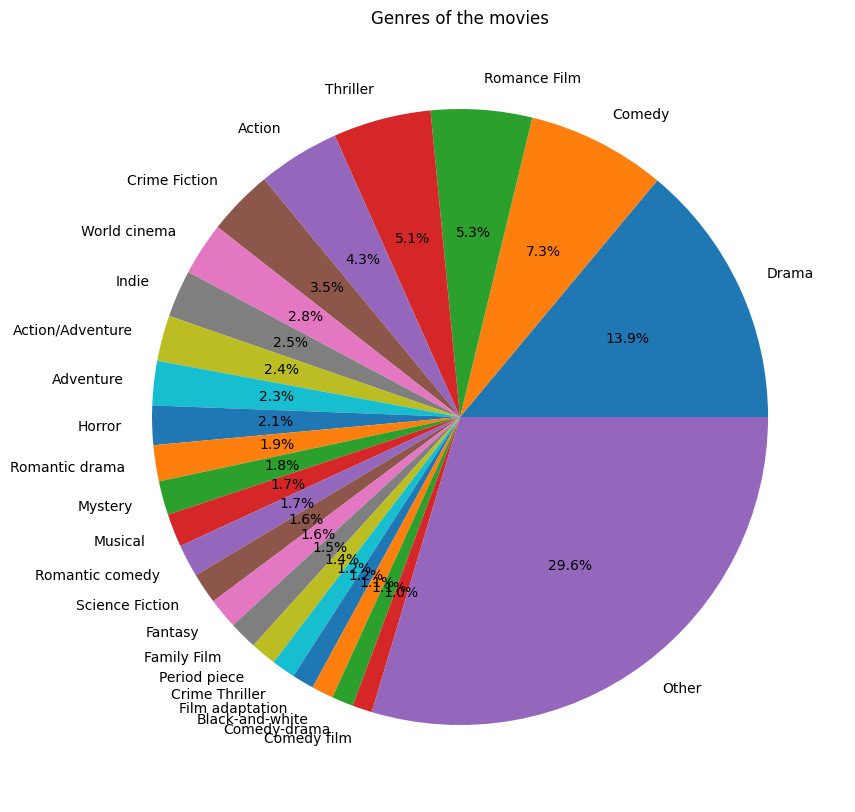

In [20]:
# Visualizing the genres of the movies with a pie chart (under 1% grouped as 'Other')


# Grouping the movies by genre and counting the number of movies in each genre
movies_by_genre = mov_char_data['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
movies_by_genre = movies_by_genre[movies_by_genre != ''].value_counts()

# Grouping the genres with less than 1% of the total number of movies as 'Other'
threshold = 0.01
total_movies = movies_by_genre.sum()
movies_by_genre = movies_by_genre[movies_by_genre / total_movies > threshold]
movies_by_genre['Other'] = total_movies - movies_by_genre.sum()



# Visualizing the genres of the movies with a pie chart
plt.figure(figsize=(10, 10))
plt.pie(movies_by_genre, labels=movies_by_genre.index, autopct='%1.1f%%')
plt.title('Genres of the movies')
plt.show()



#### Information about the actor gender

In [ ]:
# Isolting the genders columns
new_df = mov_char_data[['Actor_gender', 'Actor_name']]
new_df.head()


gender_counts = new_df['Actor_gender'].value_counts()

# Calculate percentages
gender_percentages = gender_counts / gender_counts.sum() * 100

# Plotting the percentages using a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Actor Genders')
plt.show()


#### Correlation matrix  

In [25]:
def encode_categorical_features(df):
    # Identify categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize a LabelEncoder
    le = LabelEncoder()
    
    # Apply label encoding to each categorical feature
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature].astype(str))
    
    return df

def plot_correlation_matrix(df):
    # Encode categorical features
    df_encoded = encode_categorical_features(df.copy())
    
    # Calculate the correlation matrix, automatically excluding NaN values
    corr_matrix = df_encoded.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

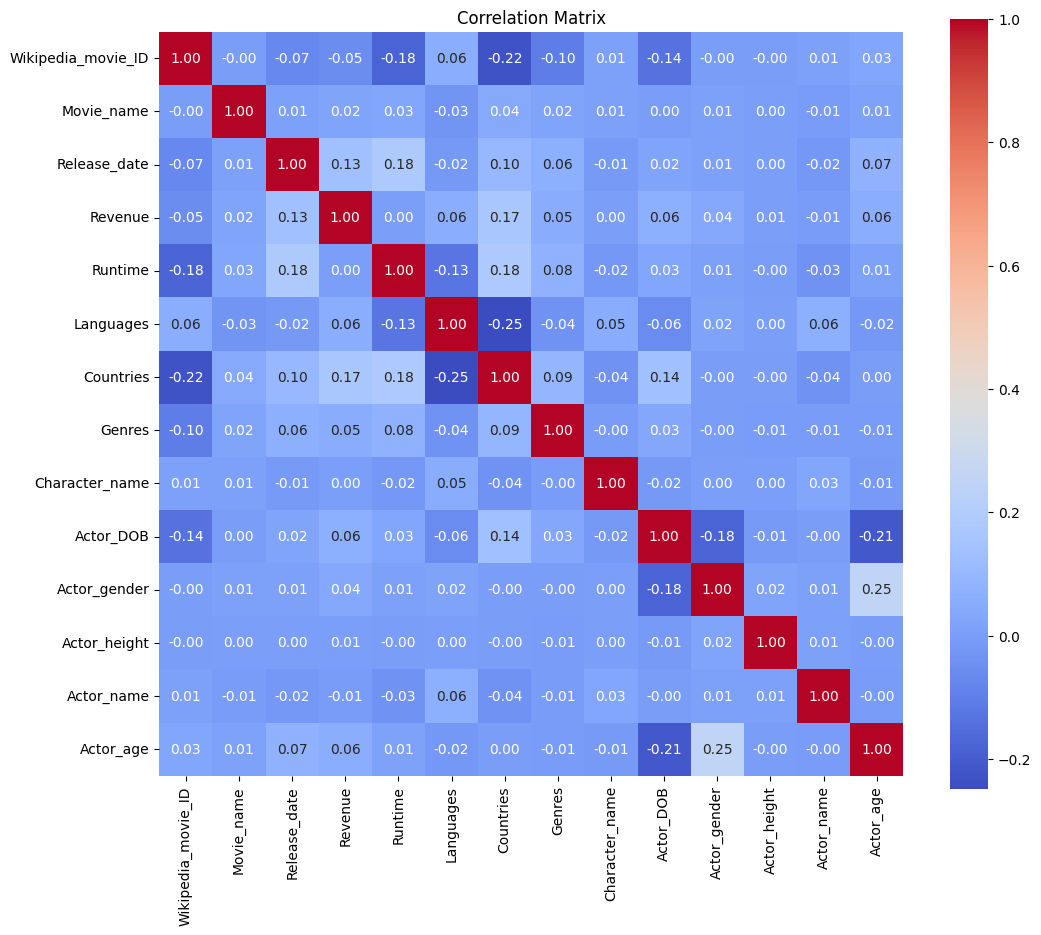

In [30]:
from sklearn.preprocessing import LabelEncoder

plot_correlation_matrix(mov_char_data)

We observe some very slight relationships within the movie and character dataset: a moderate positive correlation between 'Runtime' and 'Revenue' suggests that longer movies tend to generate more revenue. Conversely, a negative correlation between 'Languages' and 'Countries' indicates that films with more languages are produced in fewer countries, highlighting trends in film production and distribution.

## Trend evaluation
To assess what impact a movie had on child naming, we first try a simple model that computes the average count of babies named like a character 5 years before and 5 years after the movie's release, and compute their difference. The higher it is, the higher the trend the year the film was released.

Here is a demo of the model printing the top10 trend-inducing character names

In [ ]:
from src.models.trend_evaluation import trend_eval_ranking

ranking = trend_eval_ranking(global_names.clean_df, mov_char_data)
print(ranking[["Character_name","movie_name","release_year"]].head(10))


### Trend visualisation
Using the previously computed trend-inducing movies, we can now plot the baby name popularity over time with a red line on the year of the most influential movie for this name.

Note that we need to indicate the name in uppercase for compatibility with name datasets and add the gender M/F to avoid confusion for androgenous names.

In [ ]:
from src.models.trend_evaluation import plot_trend

plot_trend("LUKE", "M", ranking, global_names.clean_df)

## Name prediction

To answer our research questions, we needed to find a method to determine if after a specific date, the count of name would follow an abnormal evolution.

There are multiple ways to do it and for our first tentative, we decided to try interrupted time series.

### ITS - Interrupted time series
The concept is rather simple: at a specific point in time, we split our measurements in two parts and use the first one to train a model. This model will try to predict what the evolution would have been based on the previous behaviour and once we get it, we can compare it with the second part of the data that we kept. 

As mentioned in the explanation, we need to chose a model for this and after some researches, we decided to try the two following ones.

We are still evaluating how well they are suited for our project, since the training sample is quite limited due to the granularity of the data. (Count is by year)

#### SARIMA - Seasonal Autoregressive Integrated Moving Average
Well known model for univariate time series forecasting, SARIMA is an extension of the ARIMA model and adds the support for time series with a seasonal behaviour in addition to the trend support of ARIMA. 

In [ ]:
from src.models.naming_prediction import predict_naming_ARIMA

prediction = predict_naming_ARIMA(global_names, "LUKE", 1976, 10, True)

#### Prophet
Developped by Facebook, Prophet is a fully automatic procedure made for time series forecasting that is used in various context due it's wide range of features (seasonality, holidy effect, ...)   

In [ ]:
from src.models.naming_prediction import predict_naming_prophet

prediction = predict_naming_prophet(global_names, "LUKE", 1976, 10, True)

#### Model conclusion
We still need to compare the two models and see if the ITS approach would be beneficial for our project since other options are available.